In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Задание 2.1
Выбрать значение шага дискретизации в пределах от 5 до 15. Продискретизировать с этим шагом дискретизации изображение и вывести его на экран.

In [ ]:
image = cv2.imread('images/mustang.jpg')
img = image.copy()
k = 10
s = img.shape
h1, w1 = s[0], s[1]
h = (s[0] - s[0] % k)
w = (s[1] - s[1] % k)
img = cv2.resize(img, (w,h))

for y in range(0, h-1, k):
    for x in range(0, w-1, k):
        if len(s) > 2:
            s = np.average(img[y:(y+k), x:(x+k)], axis=0)
            img[y:(y+k), x:(x+k)] = np.average(s, axis=0)
        else:
            s = img[y:(y+k), x:(x+k)]
            img[y:(y+k), x:(x+k)] = np.average(s)
img = cv2.resize(img, (w1, h1))
res = np.hstack((image, img))
cv2.imshow('Img', res)
cv2.waitKey(0)

# Задание 2.2
Проквантовать изображение, сократив число градаций до 4

-1

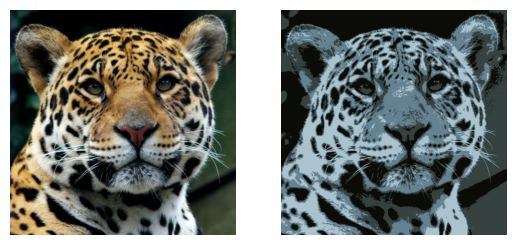

In [14]:
plt.subplot(121)
img = cv2.imread('images/jaguar.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(122)
plt.axis("off")
Z = img.reshape((-1,3))
Z = np.float32(Z)
crt=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,
     10, 1.0)
K = 4
ret, label, center = cv2.kmeans(Z, K, None, crt, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
plt.imshow(res2)
cv2.waitKey(0)